In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jalaj\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# define data locations

data_dir = 'Gutenberg_English_Fiction_1k/'
target_file = 'master996.csv'
corpus_dir = 'Gutenberg_19th_century_English_Fiction/'

In [3]:
# import target

data = pd.read_csv(data_dir + target_file, sep=';', engine='python')
data.loc[:]['book_id'] = data['book_id'].apply(lambda book_id: book_id[:-5]) # remove '.epub' ending
data.set_index('book_id', inplace=True)
data

,Book_Name,guten_genre,Author_Name
book_id,,,
pg10067,The Mystery of the Boule Cabinet: A Detective ...,Detective and Mystery,Stevenson| Burton Egbert
pg1032,The Pupil,Literary,James| Henry
pg10379,At Love's Cost,Literary,Garvice| Charles
pg10473,The Heart of the Range,Western Stories,White| William Patterson
pg10812,The Worshipper of the Image,Literary,Gallienne| Richard Le
...,...,...,...
pg766DickensDavidCopfld,David Copperfield,Literary,Dickens| Charles
pg786DickensHardTimes,Hard Times,Literary,Dickens| Charles
pg834DoyleMemoirsSherlk,Memoirs of Shelock Holmes,Detective and Mystery,Connan| Doyle


In [4]:
# import corpus

def get_book_content(book_id):      
    filename = data_dir + corpus_dir + book_id + '-content.html'
    
    with open(filename, encoding='utf-8') as file:        
        try:
            content = file.read()
            
        except UnicodeDecodeError:
            print('UnicodeDecodeError trying to read {}. Returning None.'.format(book_id))
            return None
        
        content = content.replace('<p>','')   
        
    return content

data['content'] = [get_book_content(book_id) for book_id in data.index]
data

,Book_Name,guten_genre,Author_Name,content
book_id,,,,
pg10067,The Mystery of the Boule Cabinet: A Detective ...,Detective and Mystery,Stevenson| Burton Egbert,A Detective Story\nA.B.M. Fellow-Sherlockian\n...
pg1032,The Pupil,Literary,James| Henry,This edition first published 1916\nThe text fo...
pg10379,At Love's Cost,Literary,Garvice| Charles,"""Until this moment I have never fully realised..."
pg10473,The Heart of the Range,Western Stories,White| William Patterson,"""The Rider of Golden Bar,"" ""Hidden Trails,"" ""L..."
pg10812,The Worshipper of the Image,Literary,Gallienne| Richard Le,The Worshipper of the Image\nEvening was in th...
...,...,...,...,...
pg766DickensDavidCopfld,David Copperfield,Literary,Dickens| Charles,I do not find it easy to get sufficiently far ...
pg786DickensHardTimes,Hard Times,Literary,Dickens| Charles,The One Thing Needful\nMurdering the Innocents...
pg834DoyleMemoirsSherlk,Memoirs of Shelock Holmes,Detective and Mystery,Connan| Doyle,"""I am afraid, Watson, that I shall have to go,..."


In [5]:
#to faster debug, i use a smaller subset of the texts right now:
data_content = data['content'][:10]

In [6]:
import maPrepro
data_content_filtered = maPrepro.prepare_texts(data_content, use_stemming=True)

Text Count:  10  Progress: 
0

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jalaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


123456789

In [7]:
#--------------------------
#Tokenization to integers:

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None, #max number of words, only the X most relevant words will be taken
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', #signs that are filtered out
    lower=True, #when true, everything will be converted tp lower case
    split=" ", #word seperator
    char_level=False, #if true, every char will be treated as token
    oov_token=None, #out-of-vocabulary replacement
)

In [9]:
tokenizer.fit_on_texts(data_content_filtered) #tokenizer gets fit to our texts

In [10]:
sequences = tokenizer.texts_to_sequences(data_content[0]) 
sequencesFiltered = tokenizer.texts_to_sequences(data_content_filtered[0]) 
#return a list of tokens for the X (see num_words) most common words the tokenizer knows, for every input text
print("unfiltered length: ", len(sequences), " filtered length: ", len(sequencesFiltered))

unfiltered length:  371350  filtered length:  245848


In [11]:
#from imblearn.under_sampling import RandomUnderSampler

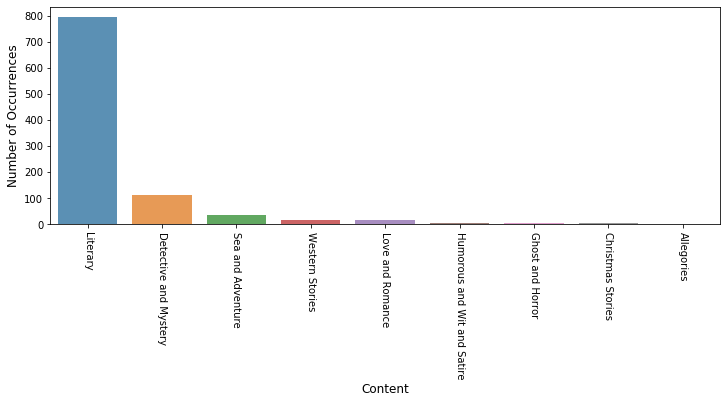

In [12]:
cnt_pro = data['guten_genre'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Content', fontsize=12)
plt.xticks(rotation=270)
plt.show();

In [13]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
data['content'] = data['content'].apply(cleanText)
data['content']

book_id
pg10067                    a detective story\na.b.m. fellow-sherlockian\n...
pg1032                     this edition first published 1916\nthe tet fol...
pg10379                    "until this moment i have never fully realised...
pg10473                    "the rider of golden bar," "hidden trails," "l...
pg10812                    the worshipper of the image\nevening was in th...
                                                 ...                        
pg766DickensDavidCopfld    i do not find it easy to get sufficiently far ...
pg786DickensHardTimes      the one thing needful\nmurdering the innocents...
pg834DoyleMemoirsSherlk    "i am afraid, watson, that i shall have to go,...
pg863Agatha1               the intense interest aroused in the public by ...
pg98DickensTaleCities      !!!!  book the first - recalled to life i.   t...
Name: content, Length: 996, dtype: object

In [23]:
train, test = train_test_split(data, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['content']), tags=[r.guten_genre]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['content']), tags=[r.guten_genre]), axis=1)

In [24]:
train_tagged.values[30]

TaggedDocument(words=['the', 'words', 'of', 'the', 'anthem', 'in', 'the', 'concluding', 'chapter', 'are', 'taken', 'from', 'sermon', 'by', 'canon', 'kno', 'little', '``', 'the', 'vision', 'of', 'the', 'truth', "''", 'preached', 'in', 'st.', 'paul', "'s", 'in', 'lent', '1883', 'and', 'published', 'in', 'the', 'witness', 'of', 'the', 'passion', 'they', 'are', 'so', 'eactly', 'in', 'accord', 'with', 'the', 'message', 'which', 'the', 'shadowy', 'beings', 'of', 'my', 'tale', 'seem', 'to', 'have', 'left', 'me', 'that', 'can', 'not', 'force', 'myself', 'to', 'coin', 'another', 'phrase', 'how', 'it', 'comes', 'to', 'pass', 'that', 'court', 'chaplain', 'should', 'be', 'walking', 'up', 'the', 'street', 'of', 'this', 'forest', 'village', 'we', 'shall', 'see', 'anon', 'at', 'first', 'sight', 'there', 'does', 'not', 'seem', 'to', 'be', 'much', 'schoolwork', 'going', 'on', 'boy', 'or', 'we', 'should', 'rather', 'say', 'child', 'of', 'fifteen', 'is', 'seated', 'at', 'an', 'open', 'window', 'looking',

In [20]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [21]:
cores

4

In [25]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████████| 697/697 [00:00<00:00, 100004.44it/s]


In [26]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████████████████████| 697/697 [00:00<?, ?it/s]


Wall time: 3min 48s


In [31]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [32]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7290969899665551
Testing F1 score: 0.6874347372084929


C:\Users\jalaj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|█████████████████████████████████████████████████████████████████████████████| 697/697 [00:00<00:00, 87133.91it/s]


In [37]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [39]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [40]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [41]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7023411371237458
Testing F1 score: 0.6780000286766439


C:\Users\jalaj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
# ANOVA feature selection for numeric input and categorical output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)

# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(697, 2)


In [46]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X_train)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.35698517 0.03299455 0.02015234]
[[-2.51237938e-02 -4.44900714e-02  1.03028193e-02 ...  1.03153869e-04
   1.21089842e-04  1.14713885e-04]
 [-2.01305291e-01  5.38365202e-02 -3.79425753e-02 ... -2.70671666e-04
   2.89576852e-04  1.42067712e-04]
 [ 5.22199505e-02  1.16785417e-01  3.42909687e-03 ...  4.80588186e-04
   1.40576654e-05 -1.24050672e-04]]


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.00000000e+00 1.14967947e-03 2.02608124e-03 2.70986025e-03
 3.52470861e-04 1.01479238e-03 7.74932365e-04 3.11473102e-03
 0.00000000e+00 1.35676689e-03 1.52537814e-03 2.26636449e-03
 2.93319870e-03 1.29290646e-03 1.19095596e-03 1.28947214e-03
 2.93936432e-03 2.75975205e-03 2.35203845e-03 0.00000000e+00
 4.96997758e-03 7.81460005e-04 2.06620885e-03 1.01666297e-03
 9.90625109e-04 1.29246357e-03 1.32599538e-03 1.97159663e-03
 0.00000000e+00 3.13109577e-04 2.56334402e-03 2.83180020e-03
 5.65384327e-04 1.61123150e-04 4.32244149e-03 2.29053138e-03
 6.76866181e-04 0.00000000e+00 2.14252186e-03 1.58720231e-03
 2.54983559e-03 4.05916953e-04 6.72365004e-04 7.89718431e-04
 1.08272946e-03 2.01216540e-03 2.36084459e-03 2.42287801e-03
 1.13656747e-03 1.32249012e-03 1.40215619e-03 1.43018452e-03
 3.82543095e-03 7.63165292e-04 8.87729070e-04 3.05758806e-03
 1.88699343e-03 3.33201826e-03 1.82515557e-03 5.78431658e-04
 8.92496890e-04 1.53346404e-03 2.30921644e-03 4.13152464e-03
 4.68955107e-04 6.716080

# Sentiment Analysis Part

In [4]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

In [5]:
def extract_features(word_list):
    return dict([(word, True) for word in word_list])

In [ ]:
if __name__=='__main__':
   # Load positive and negative reviews  
    positive_fileids = movie_reviews.fileids('pos')
    negative_fileids = movie_reviews.fileids('neg')

In [ ]:
features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 'Negative') for f in negative_fileids]

In [7]:
# Split the data into train and test (80/20)
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

NameError: name 'features_positive' is not defined

In [ ]:
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]  
print "\nNumber of training datapoints:", len(features_train)
print "Number of test datapoints:", len(features_test)

In [ ]:
# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(features_train)
print "\nAccuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test)

In [ ]:
print "\nTop 10 most informative words:"
for item in classifier.most_informative_features()[:10]:
    print item[0]

In [ ]:
# Sample input reviews
input_reviews = [
   "It is an amazing movie", 
   "This is a dull movie. I would never recommend it to anyone.",
   "The cinematography is pretty great in this movie", 
   "The direction was terrible and the story was all over the place" 
]

In [ ]:
print "\nPredictions:"
for review in input_reviews:
    print "\nReview:", review
    probdist = classifier.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()

In [ ]:
print "Predicted sentiment:", pred_sentiment 
print "Probability:", round(probdist.prob(pred_sentiment), 2)